In [1]:
# Работа с данными 
import pandas as pd
import numpy as np

# Визуалцияция результатов обучения
import matplotlib.pyplot as plt

import sklearn
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler, OneHotEncoder,LabelEncoder,PolynomialFeatures
from sklearn.compose import make_column_transformer

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import confusion_matrix, roc_curve, plot_roc_curve, auc, ConfusionMatrixDisplay,roc_auc_score,r2_score,mean_squared_error,mean_absolute_error
import sklearn.datasets
import sklearn.metrics as metrics
from sklearn import preprocessing
import pingouin as pg

In [2]:
df = pd.read_csv(r'../data/06.csv')

In [3]:
df = df.drop(columns = 'Unnamed: 0')

In [4]:
df

,agegp,alcgp,tobgp,ncases,ncontrols
0,25-34,0-39g/day,0-9g/day,0,40
1,25-34,0-39g/day,10-19,0,10
2,25-34,0-39g/day,20-29,0,6
3,25-34,0-39g/day,30+,0,5
4,25-34,40-79,0-9g/day,0,27
...,...,...,...,...,...
83,75+,40-79,30+,1,1
84,75+,80-119,0-9g/day,1,1
85,75+,80-119,10-19,1,1
86,75+,120+,0-9g/day,2,2


# Линейная регрессия

In [5]:
import pandas  as pd #Data manipulation
import numpy as np #Data manipulation
import matplotlib.pyplot as plt # Visualization
import seaborn as sns #Visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

/var/folders/9v/5p5m1vyn1l15r6g0mn4h76wc0000gn/T/ipykernel_23793/1904280156.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


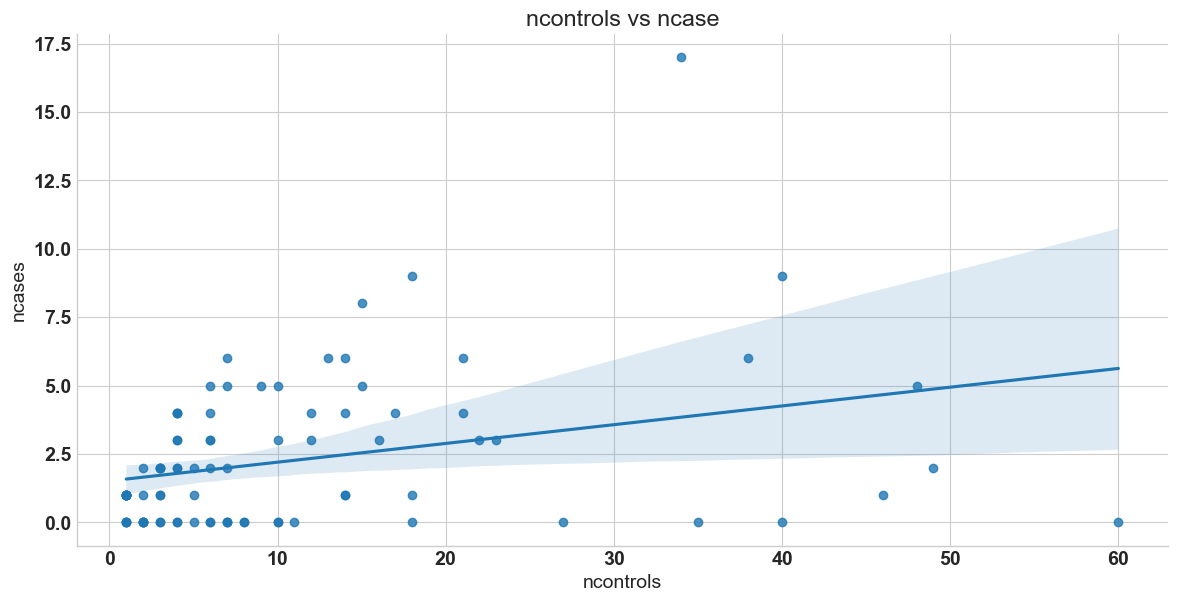

In [6]:
sns.lmplot(x='ncontrols',y='ncases',data=df,aspect=2,height=6)
plt.xlabel('ncontrols')
plt.ylabel('ncases')
plt.title('ncontrols vs ncase');

In [7]:
df.describe()

,ncases,ncontrols
count,88.000000,88.000000
mean,2.272727,11.079545
std,2.753169,12.722703
min,0.000000,1.000000
25%,0.000000,3.000000
50%,1.000000,6.000000
75%,4.000000,14.000000
max,17.000000,60.000000


/var/folders/9v/5p5m1vyn1l15r6g0mn4h76wc0000gn/T/ipykernel_23793/3099542220.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


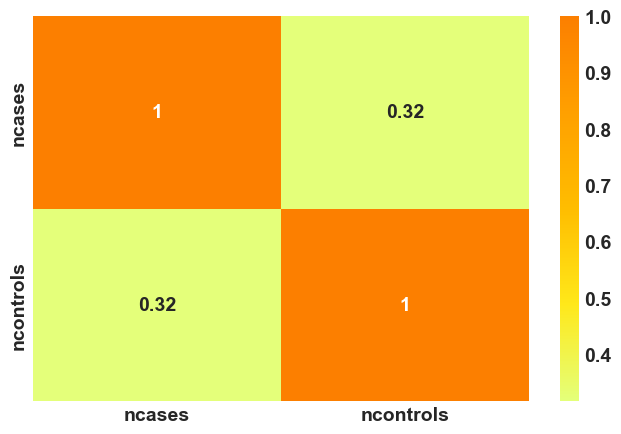

In [8]:
# correlation plot
corr = df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

кореляция отсутствует

/var/folders/9v/5p5m1vyn1l15r6g0mn4h76wc0000gn/T/ipykernel_23793/597444578.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ncontrols'],bins=50,color='r',ax=ax)
/var/folders/9v/5p5m1vyn1l15r6g0mn4h76wc0000gn/T/ipykernel_23793/597444578.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n

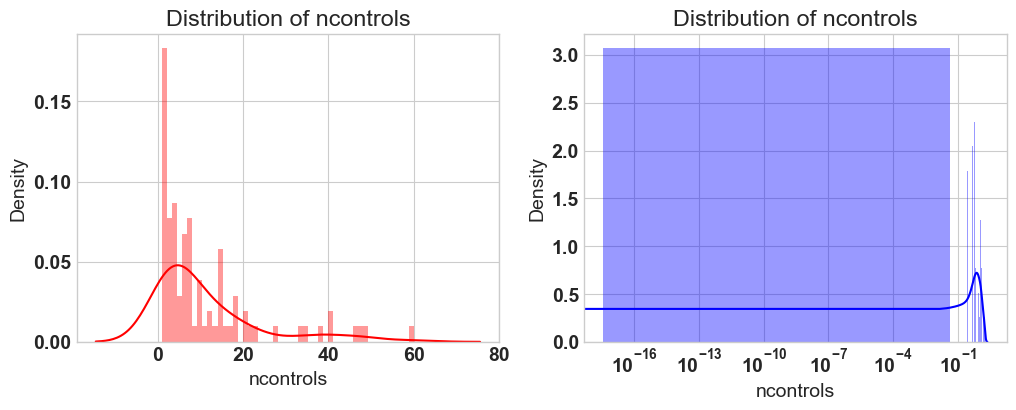

In [9]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(df['ncontrols'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of ncontrols')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['ncontrols']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of ncontrols')
ax.set_xscale('log');

Text(0.5, 1.0, 'Violin plot of ncontrols vs ncases')

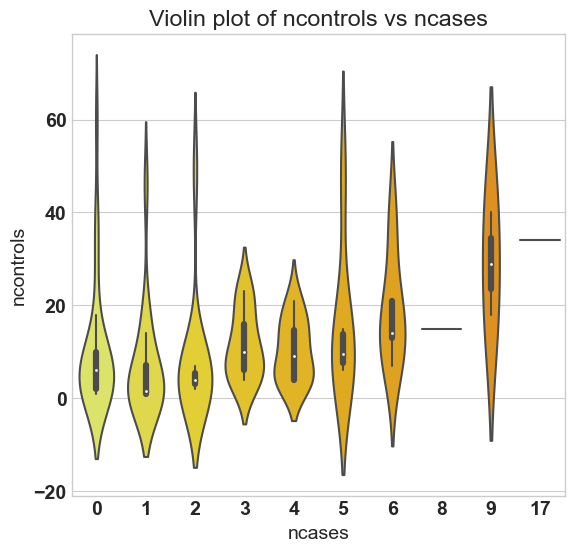

In [10]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='ncases', y='ncontrols',data=df,palette='Wistia',ax=ax)
ax.set_title('Violin plot of ncontrols vs ncases')


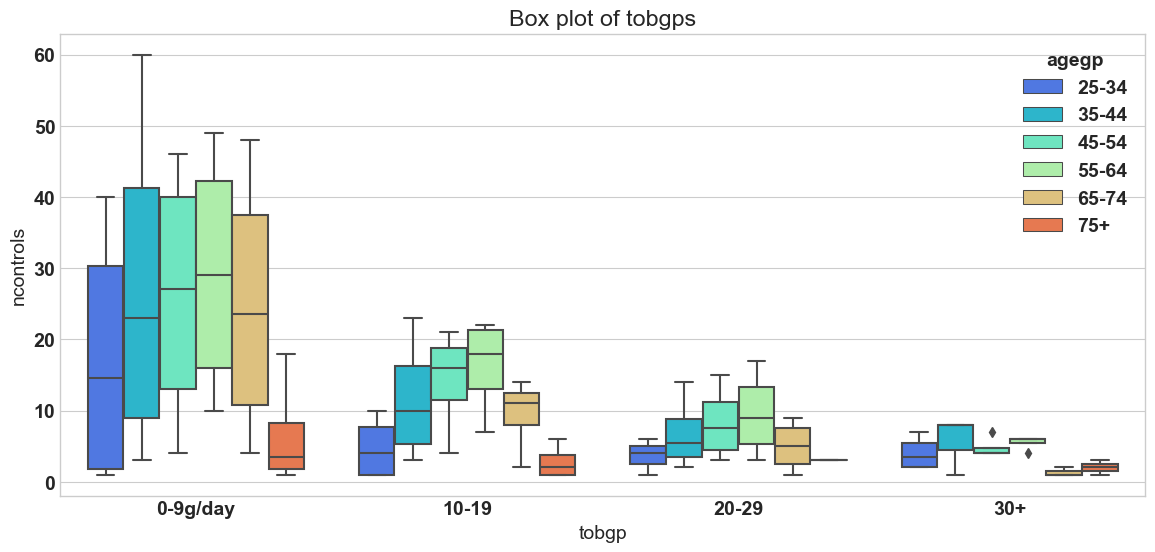

In [11]:
plt.figure(figsize=(14,6))
sns.boxplot(x='tobgp', y='ncontrols',hue='agegp',data=df,palette='rainbow')
plt.title('Box plot of tobgps');

# Преобразование категориальных переменных

Напишем функцию расчёта основных показателей регрессии

In [12]:

def regression_results(y_true, y_pred):
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 

    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))
    try:
      mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
      print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    except:
      pass    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [13]:
df

,agegp,alcgp,tobgp,ncases,ncontrols
0,25-34,0-39g/day,0-9g/day,0,40
1,25-34,0-39g/day,10-19,0,10
2,25-34,0-39g/day,20-29,0,6
3,25-34,0-39g/day,30+,0,5
4,25-34,40-79,0-9g/day,0,27
...,...,...,...,...,...
83,75+,40-79,30+,1,1
84,75+,80-119,0-9g/day,1,1
85,75+,80-119,10-19,1,1
86,75+,120+,0-9g/day,2,2


ПРименим one-hot encoding

In [14]:
categorical_columns = ['agegp','alcgp', 'tobgp']
df_encode = pd.get_dummies(data = df, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns,
               drop_first =True,
              dtype='int64')

In [15]:
df['agegp'].unique()

array(['25-34', '35-44', '45-54', '55-64', '65-74', '75+'], dtype=object)

In [16]:
df['tobgp'].unique()

array(['0-9g/day', '10-19', '20-29', '30+'], dtype=object)

In [17]:
df['alcgp'].unique()

array(['0-39g/day', '40-79', '80-119', '120+'], dtype=object)

In [18]:
df_encode.head()

,ncases,ncontrols,OHE_35-44,OHE_45-54,OHE_55-64,OHE_65-74,OHE_75+,OHE_120+,OHE_40-79,OHE_80-119,OHE_10-19,OHE_20-29,OHE_30+
0,0,40,0,0,0,0,0,0,0,0,0,0,0
1,0,10,0,0,0,0,0,0,0,0,1,0,0
2,0,6,0,0,0,0,0,0,0,0,0,1,0
3,0,5,0,0,0,0,0,0,0,0,0,0,1
4,0,27,0,0,0,0,0,0,1,0,0,0,0


Построим модель линейной регрессии

In [19]:
X =df_encode.drop(columns="ncontrols")
Y=df_encode["ncontrols"]
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=1)

In [20]:
model = LinearRegression(fit_intercept=True)  # объявляем модель
model.fit(X_train, y_train)

LinearRegression()

Коэффициенты перед теттами в функции

In [21]:
model.coef_

array([  0.6595408 ,   5.75405208,   3.71304815,   5.79295011,
         1.92922155,  -9.89852368, -16.75161675,  -3.07191564,
       -14.53981597, -13.29998371, -16.62771956, -18.77475326])

Свободная переменная

In [22]:
model.intercept_

27.576450342277596

In [23]:
test_preds = model.predict(X_test)

In [24]:
regression_results(y_test,test_preds)

explained_variance:  0.5415
r2:  0.5387
MAE:  6.3593
MSE:  58.1102
RMSE:  7.623


Качество модели можно назвать средним. Будем улучшаять MSE через lasso и ridge.

/var/folders/9v/5p5m1vyn1l15r6g0mn4h76wc0000gn/T/ipykernel_23793/3738467970.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - test_preds),ax=ax,color='b')


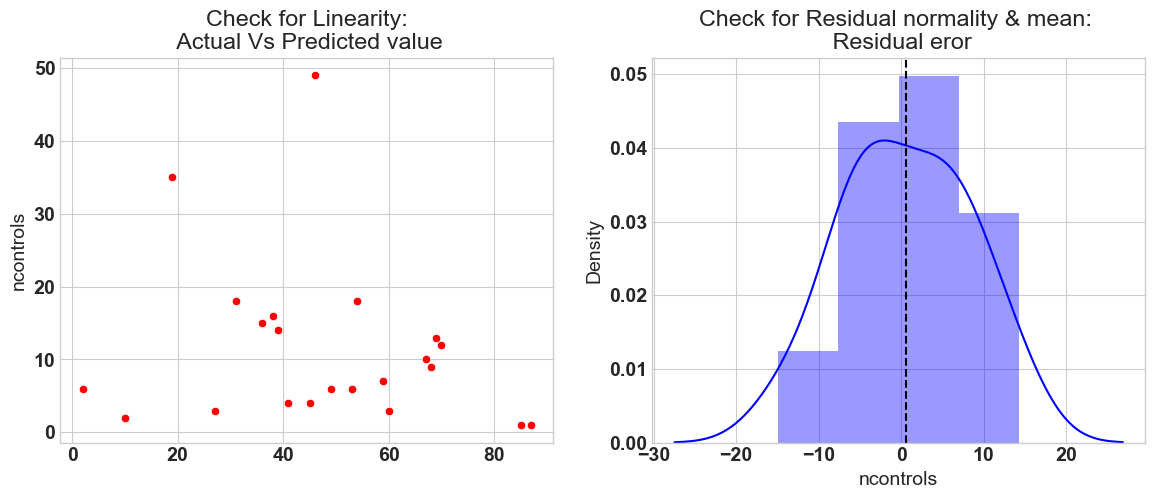

In [25]:
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

ax = f.add_subplot(122)
sns.distplot((y_test - test_preds),ax=ax,color='b')
ax.axvline((y_test - test_preds).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

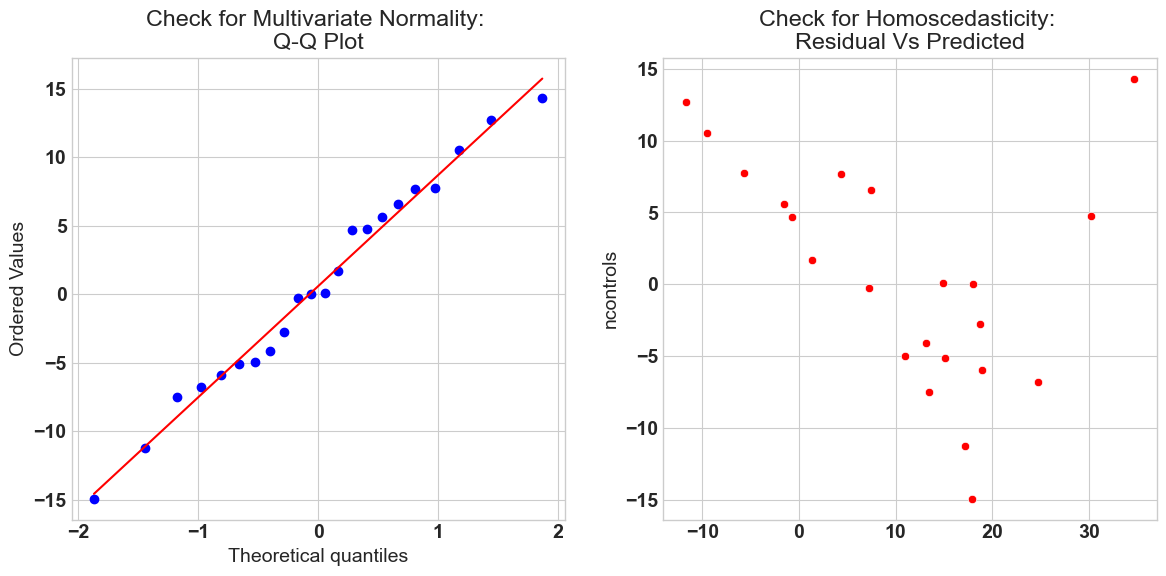

In [26]:
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - test_preds),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - test_preds), x= test_preds, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

# Lasso

Лассо-регрессия накладывает штраф на l1-норму бета-вектора. l1-норма вектора — это сумма абсолютных значений в этом векторе. Это заставляет лассо-регрессию обнулять некоторые коэффициенты в бета-векторе.

In [27]:
from sklearn.linear_model import Lasso, LassoCV

lasso_cv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lasso_cv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

Находим искомую альфа.

In [28]:
alpha = lasso_cv.alpha_
alpha

0.03131069372783516

In [29]:
lasso = Lasso(alpha = lasso_cv.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=0.03131069372783516)

In [30]:
lasso_pred = lasso.predict(X_test)

In [31]:
regression_results(y_test,lasso_pred)

explained_variance:  0.556
r2:  0.5531
MAE:  6.2637
MSE:  56.302
RMSE:  7.5035


Точность на обучающей выборке.

In [32]:
lasso.score(X_train, y_train)

0.7191112616589219

Точность на тестовой выборке.

In [33]:
lasso.score(X_test, y_test)

0.5530705561863434

In [34]:
names = X_train.columns

Оценим влияние паарамтера альфа на признаки.

In [35]:
def lasso1(alphas):
    df = pd.DataFrame()
    df['Feature Name'] = names
    for alpha in alphas:
        lasso = Lasso(alpha=alpha)
        lasso.fit(X, Y)
        column_name = 'Alpha = %f' % alpha
        df[column_name] = lasso.coef_
    return df

In [36]:
lasso1([alpha])

,Feature Name,Alpha = 0.031311
0,ncases,0.595624
1,OHE_35-44,4.130396
2,OHE_45-54,3.806550
3,OHE_55-64,4.502533
4,OHE_65-74,0.625566
5,OHE_75+,-8.132068
6,OHE_120+,-15.847235
7,OHE_40-79,-3.031690
8,OHE_80-119,-12.732810
9,OHE_10-19,-11.085610


## Корреляции между целевым значением и признаками

In [37]:
X_test["lasso"] = lasso_pred

/var/folders/9v/5p5m1vyn1l15r6g0mn4h76wc0000gn/T/ipykernel_23793/146390907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test["lasso"] = lasso_pred


In [38]:
X_test

,ncases,OHE_35-44,OHE_45-54,OHE_55-64,OHE_65-74,OHE_75+,OHE_120+,OHE_40-79,OHE_80-119,OHE_10-19,OHE_20-29,OHE_30+,lasso
60,2,0,0,1,0,0,1,0,0,0,1,0,1.141834
69,6,0,0,0,1,0,0,0,1,0,0,0,18.731508
53,3,0,0,1,0,0,0,1,0,0,0,1,13.038875
54,9,0,0,1,0,0,0,0,1,0,0,0,24.689347
70,4,0,0,0,1,0,0,0,1,1,0,0,4.519874
85,1,0,0,0,0,1,0,0,1,1,0,0,-8.701097
59,6,0,0,1,0,0,1,0,0,1,0,0,7.388398
41,2,0,1,0,0,0,0,0,1,0,0,1,-0.422355
45,4,0,1,0,0,0,1,0,0,0,0,1,-1.130311
38,3,0,1,0,0,0,0,0,1,0,0,0,18.294780


In [39]:
for i in names:
    print(pg.partial_corr(data=X_test, x="lasso", y=i),"\n")

          n       r          CI95%     p-val
pearson  22  0.2282  [-0.21, 0.59]  0.307049 

          n         r          CI95%     p-val
pearson  22  0.346757  [-0.09, 0.67]  0.113876 

          n         r          CI95%     p-val
pearson  22 -0.069676  [-0.48, 0.36]  0.758001 

          n         r          CI95%     p-val
pearson  22  0.280233  [-0.16, 0.63]  0.206525 

          n         r          CI95%     p-val
pearson  22  0.081947  [-0.35, 0.49]  0.716949 

          n         r         CI95%     p-val
pearson  22 -0.576543  [-0.8, -0.2]  0.004974 

          n         r          CI95%     p-val
pearson  22 -0.386147  [-0.69, 0.04]  0.075889 

          n         r          CI95%     p-val
pearson  22  0.298323  [-0.14, 0.64]  0.177489 

          n         r          CI95%     p-val
pearson  22 -0.219084  [-0.59, 0.22]  0.327293 

          n         r          CI95%     p-val
pearson  22 -0.374724  [-0.69, 0.06]  0.085747 

          n         r         CI95%     p-val


Высокую корреляцию имеет только признак возраст 35-45.

In [40]:
X_test =X_test.drop(columns = 'lasso')

# Ridge

Лассо-регрессия накладывает штраф на l2-норму бета-вектора. l1-норма вектора — это корень суммы квадратов значений в этом векторе. Это заставляет ridge-регрессию обнулять некоторые коэффициенты в бета-векторе. Благодаря этому можно избежать аномалий.

In [41]:
from sklearn.linear_model import Ridge, RidgeCV

alphas = np.random.uniform(0, 10, 50)
ridge_cv = RidgeCV(alphas = alphas, cv = 10, normalize = True)
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([8.37757662, 5.43261321, 5.39613252, 5.93954049, 3.46776106,
       6.43748466, 2.8312133 , 4.53534706, 7.78959494, 2.74271545,
       0.33006081, 9.67826775, 9.91055467, 6.48225907, 2.87260564,
       7.36029669, 7.92629905, 5.64638571, 5.23605067, 0.63829062,
       1.41803494, 7.25455463, 1.19701029, 3.16368228, 6.8166391 ,
       4.59774983, 3.87139341, 7.10427836, 2.43702252, 4.08645056,
       6.05666787, 6.15633646, 2.025257  , 7.84294366, 3.86127717,
       6.67149977, 8.8581059 , 3.13235061, 7.25719056, 3.29589987,
       3.48682074, 9.60076071, 9.63341854, 1.53909175, 0.50498717,
       9.19716345, 7.63701237, 9.07354626, 0.50534902, 6.07554239]),
        cv=10, normalize=True)

Находим искомую альфа.

In [42]:
alpha = ridge_cv.alpha_
alpha

0.3300608105447467

In [43]:
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(X_train, y_train)

Ridge(alpha=0.3300608105447467)

In [44]:
ridge_pred = ridge.predict(X_test)

In [45]:
regression_results(y_test,ridge_pred)

explained_variance:  0.5668
r2:  0.5648
MAE:  6.1406
MSE:  54.8185
RMSE:  7.4039


Точность на обучающей выборке.

In [46]:
ridge.score(X_train, y_train)

0.7172359707319989

Точность на тестовой выборке.

In [47]:
ridge.score(X_test, y_test)

0.5648472903673779

In [48]:
def ridge(alphas):
    df = pd.DataFrame()
    df['Feature Name'] = names
    for alpha in alphas:
        ridge = Ridge(alpha=alpha)
        ridge.fit(X, Y)
        column_name = 'Alpha = %f' % alpha
        df[column_name] = ridge.coef_
    return df

In [49]:
ridge([alpha])

,Feature Name,Alpha = 0.330061
0,ncases,0.580953
1,OHE_35-44,4.618678
2,OHE_45-54,4.310994
3,OHE_55-64,5.019590
4,OHE_65-74,1.220615
5,OHE_75+,-7.685363
6,OHE_120+,-15.613110
7,OHE_40-79,-2.981786
8,OHE_80-119,-12.569096
9,OHE_10-19,-10.809400


## Корреляции между целевым значением и признаками

In [50]:
X_test["ridge"] = ridge_pred

In [51]:
X_test

,ncases,OHE_35-44,OHE_45-54,OHE_55-64,OHE_65-74,OHE_75+,OHE_120+,OHE_40-79,OHE_80-119,OHE_10-19,OHE_20-29,OHE_30+,ridge
60,2,0,0,1,0,0,1,0,0,0,1,0,1.485398
69,6,0,0,0,1,0,0,0,1,0,0,0,18.581121
53,3,0,0,1,0,0,0,1,0,0,0,1,13.155386
54,9,0,0,1,0,0,0,0,1,0,0,0,24.431868
70,4,0,0,0,1,0,0,0,1,1,0,0,4.991122
85,1,0,0,0,0,1,0,0,1,1,0,0,-8.054824
59,6,0,0,1,0,0,1,0,0,1,0,0,7.796033
41,2,0,1,0,0,0,0,0,1,0,0,1,0.167821
45,4,0,1,0,0,0,1,0,0,0,0,1,-0.428983
38,3,0,1,0,0,0,0,0,1,0,0,0,18.108021


In [52]:
for i in names:
    print(pg.partial_corr(data=X_test, x="ridge", y=i),"\n")

          n         r        CI95%     p-val
pearson  22  0.241838  [-0.2, 0.6]  0.278229 

          n         r          CI95%     p-val
pearson  22  0.341306  [-0.09, 0.67]  0.120059 

          n         r          CI95%     p-val
pearson  22 -0.060572  [-0.47, 0.37]  0.788877 

          n         r          CI95%     p-val
pearson  22  0.281046  [-0.16, 0.63]  0.205155 

          n        r          CI95%     p-val
pearson  22  0.08764  [-0.35, 0.49]  0.698147 

          n         r          CI95%     p-val
pearson  22 -0.579326  [-0.8, -0.21]  0.004722 

          n         r          CI95%     p-val
pearson  22 -0.385775  [-0.69, 0.04]  0.076196 

          n         r          CI95%     p-val
pearson  22  0.303738  [-0.14, 0.64]  0.169372 

          n         r          CI95%     p-val
pearson  22 -0.218603  [-0.59, 0.22]  0.328383 

          n         r          CI95%     p-val
pearson  22 -0.368101  [-0.68, 0.06]  0.091884 

          n         r         CI95%     p-val


График различий между предугаданными значениями регрессий с использованием методов ridge и lasso.

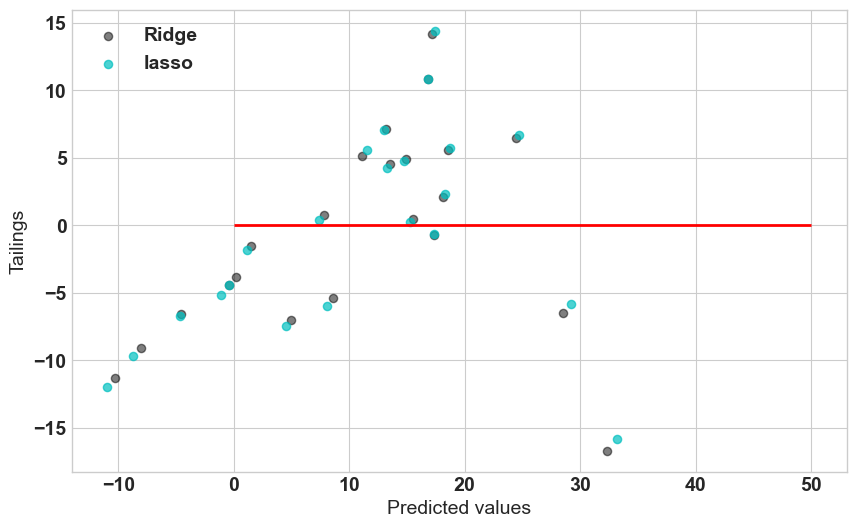

In [53]:
plt.figure(figsize=(10,6))

plt.scatter(ridge_pred,ridge_pred  - y_test,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Ridge')
plt.scatter(lasso_pred,lasso_pred- y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'lasso')
plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 50, lw = 2, color = 'red')
plt.show()

Высокую корреляцию имеет только признак возраст 35-45 и дозировка 40-79.

Лучше себя показала именно ridge регрессиия. Это обусловлено тем, что все признаки являются определяющими, тоесть не получится как в лассо убрать признаки с низким влиянием на результат или высоким p-значением, поэтому мы можем только уменьшить вес большинства переменных в модели.